In [130]:
import pandas as pd
df=pd.read_csv("/Users/prateekb/Downloads/MyPrograms/Certification/WIP/Machine Learning/Certifications/Project_Data_1.csv",
              thousands=',')

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

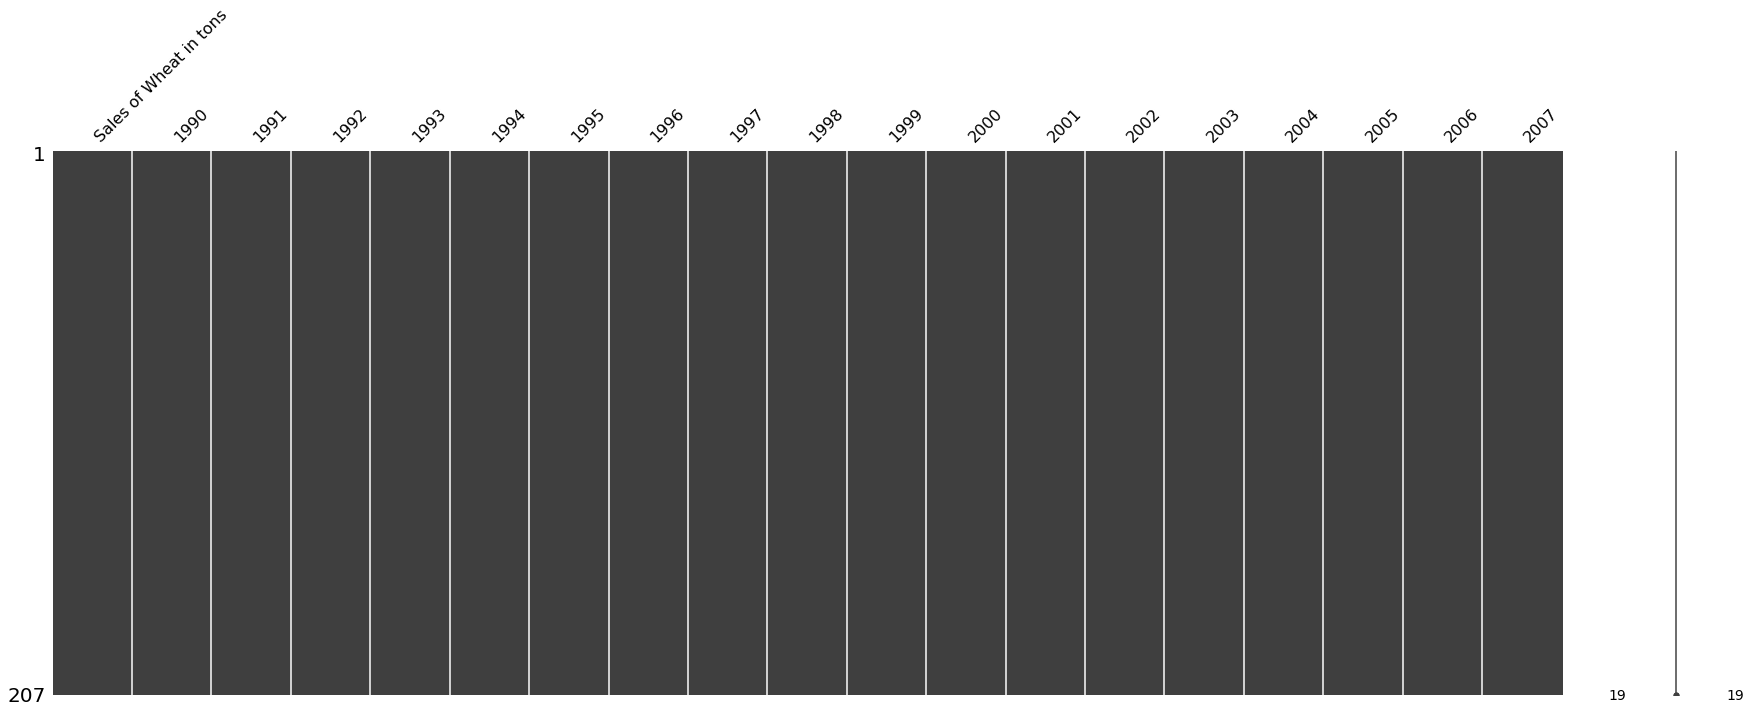

In [25]:
#No missing values
import missingno
missingno.matrix(df, figsize = (30,10))
df.isnull().sum()

In [26]:
from pandas_profiling import ProfileReport
import matplotlib
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()


In [27]:
df

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [131]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clustering_data=df.drop(['Sales of Wheat in tons'],axis=1)
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(clustering_data)
clustering_data=s.transform(clustering_data)

In [132]:
from sklearn.decomposition import PCA

pca=PCA(.95)
pca.fit(clustering_data)
pcaData=pca.transform(clustering_data)
print("The number of components after PCA:",clustering_data.shape[1])

The number of components after PCA: 18


Text(0, 0.5, 'Inertia')

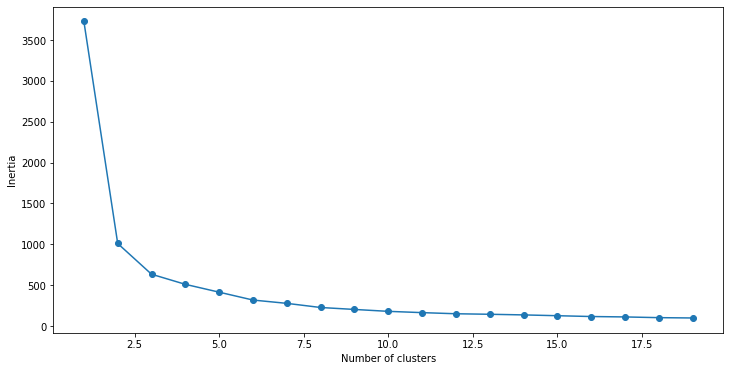

In [133]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clustering_data=df.drop(['Sales of Wheat in tons'],axis=1)
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(clustering_data)
clustering_data=s.transform(clustering_data)

withinClusterDistance = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(clustering_data)
    withinClusterDistance.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
plt.figure(figsize=(12,6))
plt.plot(range(1,20), withinClusterDistance, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [134]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_score(clustering_data,kmeans.labels_)
silhoutte_scores = []
for cluster in range(2,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(clustering_data)
    silhoutte_scores.append(silhouette_score(clustering_data,kmeans.labels_))
silhoutte_scores

[0.7005740355529829,
 0.6672924042395234,
 0.5406686241829133,
 0.5409702307598574,
 0.4846964992607655,
 0.4807322950338401,
 0.48031927073151637,
 0.4660857545742287,
 0.4750925619365172,
 0.410143079355303,
 0.4334515470169523,
 0.43671979071269,
 0.39976943706787826,
 0.4139418589098857,
 0.41334496114370367,
 0.4098356400048093,
 0.41711708054738966,
 0.40213937722529197]

In [135]:
print("The number of clusters should be 2")

The number of clusters should be 2


In [136]:
afterPCA=pd.DataFrame(pcaData,columns=['PC1','PC2'])
afterPCA['Countries']=df['Sales of Wheat in tons']
afterPCA

,PC1,PC2,Countries
0,3.498735,0.975856,Afghanistan
1,-2.936103,0.012171,Albania
2,-2.725665,-0.185039,Algeria
3,-3.445596,0.005623,American Samoa
4,-3.181315,0.033922,Andorra
...,...,...,...
202,-1.133630,0.556618,Wallis et Futuna
203,-2.810068,0.054760,West Bank and Gaza
204,0.244473,0.830551,Yemen
205,7.316843,0.060160,Zambia


In [137]:
kmeans=KMeans(n_clusters=2,n_init=15,max_iter=300,init='k-means++')
kmeans.fit(pcaData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [138]:
afterPCA['cluster']=kmeans.labels_
afterPCA

,PC1,PC2,Countries,cluster
0,3.498735,0.975856,Afghanistan,0
1,-2.936103,0.012171,Albania,1
2,-2.725665,-0.185039,Algeria,1
3,-3.445596,0.005623,American Samoa,1
4,-3.181315,0.033922,Andorra,1
...,...,...,...,...
202,-1.133630,0.556618,Wallis et Futuna,1
203,-2.810068,0.054760,West Bank and Gaza,1
204,0.244473,0.830551,Yemen,1
205,7.316843,0.060160,Zambia,0


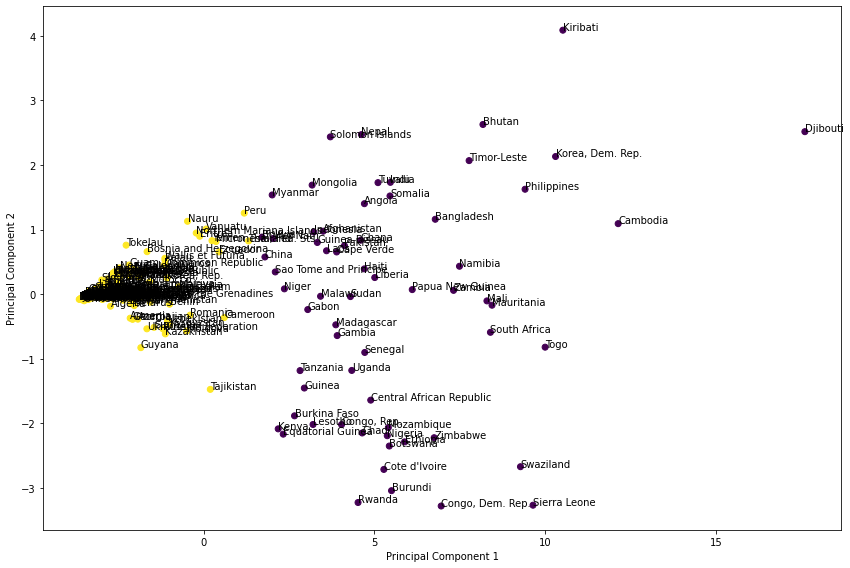

In [146]:
fig = plt.figure(figsize = (12,8))
plt.scatter(afterPCA.PC1, afterPCA.PC2,c=afterPCA.cluster)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(afterPCA.Countries):
    plt.annotate(txt, (afterPCA.PC1[i],afterPCA.PC2[i]))
plt.tight_layout()
plt.show()

In [147]:
years=df.iloc[:,1:19]
countryMean=years.mean(axis=1)
countryMean

0      353.333333
1       36.944444
2       47.388889
3       12.277778
4       25.277778
          ...    
202    126.222222
203     43.388889
204    194.333333
205    535.277778
206    512.833333
Length: 207, dtype: float64

In [148]:
scaledmean=(countryMean-countryMean.min())/countryMean.max()
scaledmean

0      0.329731
1      0.032420
2      0.042234
3      0.009240
4      0.021457
         ...   
202    0.116314
203    0.038476
204    0.180318
205    0.500705
206    0.479614
Length: 207, dtype: float64

In [149]:
afterPCA['mean']=countryMean
afterPCA['scaledmean']=scaledmean
afterPCA

,PC1,PC2,Countries,cluster,mean,scaledmean
0,3.498735,0.975856,Afghanistan,0,353.333333,0.329731
1,-2.936103,0.012171,Albania,1,36.944444,0.032420
2,-2.725665,-0.185039,Algeria,1,47.388889,0.042234
3,-3.445596,0.005623,American Samoa,1,12.277778,0.009240
4,-3.181315,0.033922,Andorra,1,25.277778,0.021457
...,...,...,...,...,...,...
202,-1.133630,0.556618,Wallis et Futuna,1,126.222222,0.116314
203,-2.810068,0.054760,West Bank and Gaza,1,43.388889,0.038476
204,0.244473,0.830551,Yemen,1,194.333333,0.180318
205,7.316843,0.060160,Zambia,0,535.277778,0.500705


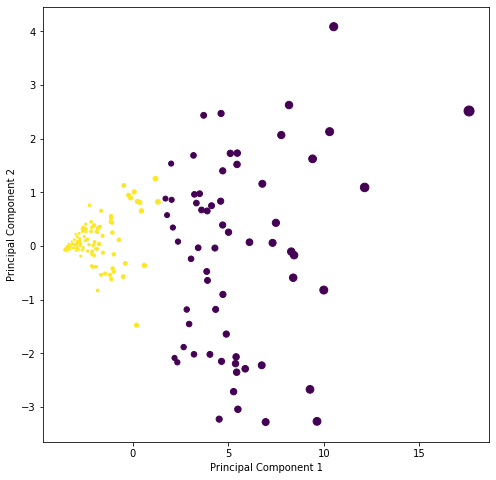

In [152]:
fig = plt.figure(figsize = (8,8))
plt.scatter(afterPCA.PC1, afterPCA.PC2,s=(afterPCA['scaledmean']*100),c=afterPCA.cluster)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

yellow ones indicates largest importer of goods


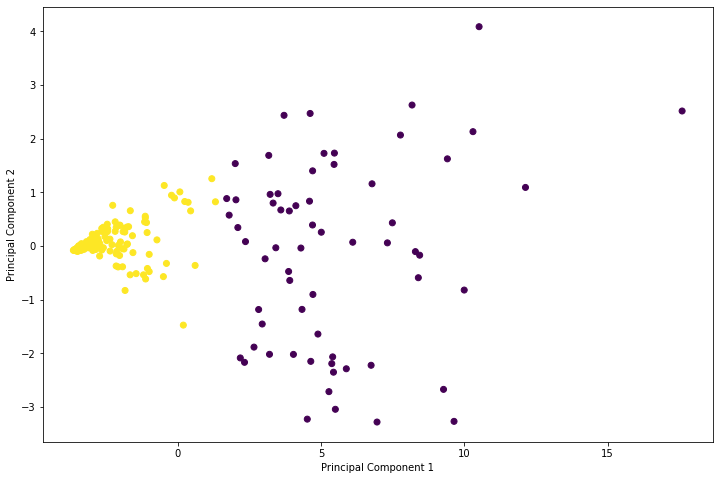

In [153]:
fig = plt.figure(figsize = (12,8))
plt.scatter(afterPCA.PC1, afterPCA.PC2,c=afterPCA.cluster)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
print("yellow ones indicates largest importer of goods")
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)